<div class="alert alert-block alert-success">
<h1>Sea ice type: Sentinel-1</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [Load Data - Matches](#section1)
2. [Sentinel-1 Image and Location of Snow Buoy for 2021-05-29](#section2)
3. [Sentinel-1 Image and Location of Snow Buoy for 2022-05-09](#section3)


<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import geoutils as gu
import xdem

from io import StringIO

import rasterio
from rasterio.plot import show

# for interactive plots only, in case of issues with plots, comment this line and restart the kernel
#%matplotlib widget

# To prevent interpolation on plots
plt.rcParams["image.interpolation"] = "none"

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Load Data - Matches
[Back to top](#TOC_TOP)

</div>

In [2]:
file = "matches_MYI.csv"
ds = pd.read_csv(file, sep=None, engine="python") 
matches = ds
matches

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,Timestamp,MYI,Difference,lat_Kako20,lon_Kako20,Average_MYI
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,2019-05-06,27.416166,58.30159,-73.78629,-28.73980,25.500000
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,2019-05-22,35.110520,45.76254,-74.53261,-32.27565,32.725000
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,2019-06-23,46.019325,39.03488,-73.49296,-37.66562,41.275000
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,2019-09-09,51.507317,45.26594,-70.21578,-40.31410,48.175000
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,2019-10-05,44.986730,43.11597,-69.06914,-39.24543,44.200000
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,2021-04-01,0.000000,52.03774,-75.58042,-37.23483,0.000000
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,2021-04-02,0.000000,24.89970,-74.45880,-31.10881,0.000000
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,2021-04-06,0.000000,50.33410,-75.21606,-36.15818,0.000000
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,2021-04-07,32.010387,52.01478,-73.99904,-27.29957,25.550001
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,2021-04-15,0.000000,19.04054,-74.45880,-31.10881,0.000000


In [3]:
# Define the mapping for old sensor numbers to new format
sensor_number_mapping = {
    "S119": "2022S119",
    "S56": "2018S56",
    "S55": "2020S55",
    "S114": "2021S114",
    "S112": "2021S112"
}

# Update the Sensor_Number column in matches_all DataFrame
matches["Sensor_Number"] = matches["Sensor_Number"].map(sensor_number_mapping).fillna(matches["Sensor_Number"])

<div class="alert alert-info" role="alert">

## <a id="section2"></a>Sentinel-1 Image and Location of Snow Buoy for 2021-05-29
[Back to top](#TOC_TOP)

</div>

In [4]:
day = 11
Timestamp = matches["Timestamp"][day] 
Snow_Buoy_Nr = matches["Sensor_Number"][day]
print(f"Day: {Timestamp}, Snow Buoy: {Snow_Buoy_Nr}")

Day: 2021-05-29, Snow Buoy: 2021S114


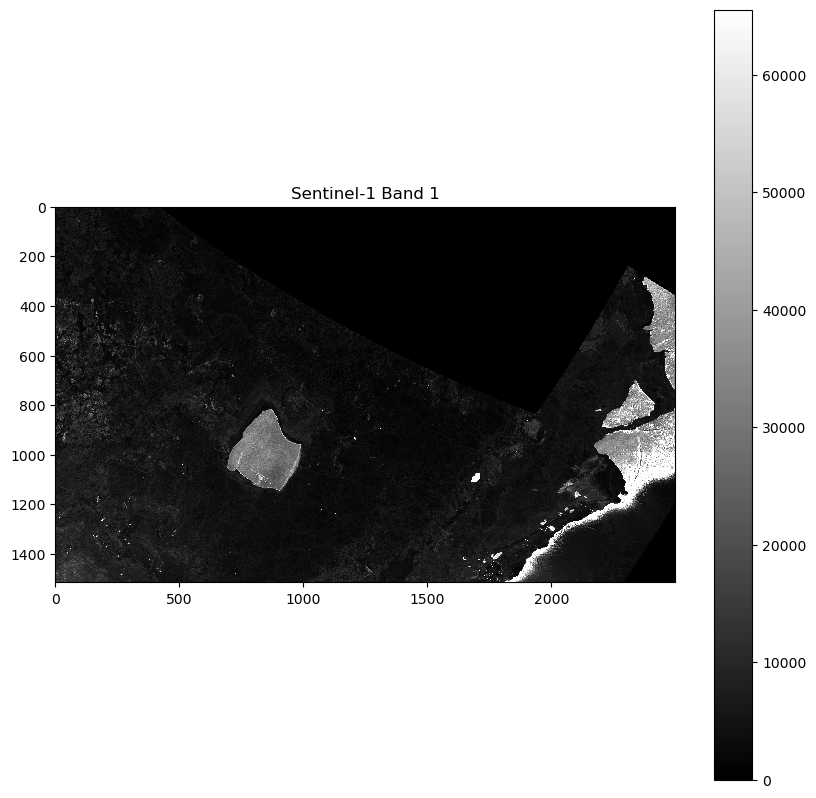

In [5]:
# Specify the path to your Sentinel-1 GeoTIFF file
file_path = "Sentinel 1 images/2021-05-29-00_00_2021-05-29-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff"


with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band
    
    plt.figure(figsize=(10, 10))
    plt.imshow(band1, cmap="gray")
    plt.colorbar()
    plt.title("Sentinel-1 Band 1")
    plt.show()


In [6]:
Sentinel1 = gu.SatelliteImage(file_path)
Sentinel1.bounds

BoundingBox(left=-47.99926757812501, bottom=-76.91293202231218, right=-24.818115234375004, top=-73.32127328531769)

In [7]:
Sentinel1.info()

Driver:               GTiff 
Opened from file:     Sentinel 1 images/2021-05-29-00_00_2021-05-29-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff 
Filename:             Sentinel 1 images/2021-05-29-00_00_2021-05-29-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff 
Loaded?               True 
Modified since load?  False 
Grid size:            2500, 1515
Number of bands:      3
Data types:           uint16
Coordinate system:    ['EPSG:4326']
Nodata value:         None
Pixel interpretation: Area
Pixel size:           0.009272460937500001, 0.002370731839600323
Upper left corner:    -47.99926757812501, -76.91293202231218
Lower right corner:   -24.818115234375004, -73.32127328531769



In [8]:
print(f"EPSG code: {Sentinel1.crs.to_epsg()}\n")
print(f"Printed as WKT string: \n{Sentinel1.crs.to_wkt()}")

EPSG code: 4326

Printed as WKT string: 
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_44224\3242590218.py:14: RuntimeWarning: divide by zero encountered in log10
  decibel = 10 * np.log10(band1_db)


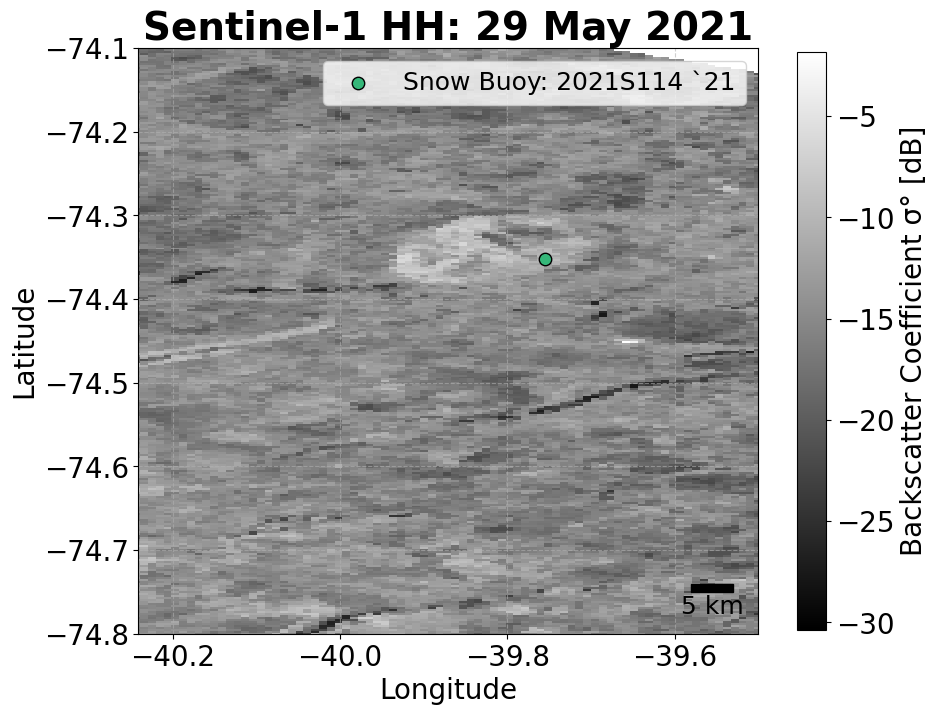

In [9]:
# Load the raster image (Sentinel-1 data)
with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band

    # Get the affine transformation of the raster
    transform = src.transform

    # Create a larger figure
    plt.figure(figsize=(10, 10))

    scaling_factor = 100000  
    band1_db = band1 / scaling_factor

    decibel = 10 * np.log10(band1_db)
    
    # Display the raster image
    img = plt.imshow(decibel, cmap="gray", extent=(
        transform[2],  # xmin (left)
        transform[2] + transform[0] * band1.shape[1],  # xmax (right)
        transform[5] + transform[4] * band1.shape[0],  # ymin (bottom)
        transform[5]  # ymax (top)
    ))

    # Adjust the color bar size
    cbar = plt.colorbar(img, shrink=0.75)  # Shrink to make it smaller
    cbar.set_label("Backscatter Coefficient σ° [dB]", fontsize=20)
    cbar.ax.tick_params(labelsize=20)  # Set colorbar tick label size

    # Title and labels
    plt.title("Sentinel-1 HH: 29 May 2021", fontsize=28, fontweight="bold")
    plt.xlabel("Longitude", fontsize=20)
    plt.ylabel("Latitude", fontsize=20)

    # Assuming you have the buoy"s coordinates
    Buoy_lon = matches.loc[day, "lon_buoy"]  # Longitude of the buoy
    Buoy_lat = matches.loc[day, "lat_buoy"]  # Latitude of the buoy
    
    # Plot the buoy location
    plt.scatter(Buoy_lon, Buoy_lat, color="#35b779", marker="o", s=80, label="Snow Buoy: 2021S114 `21", edgecolor="black")


    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    import matplotlib.font_manager as fm

        # Add scale bar
    fontprops = fm.FontProperties(size=18)
    scale_factor_km = 1.0  # Adjust based on your actual scaling factor in degrees to kilometers
    scalebar = AnchoredSizeBar(plt.gca().transData,
                               0.05,  # Length of the bar in data units (longitude degrees here)
                               "5 km",  # Label
                               "lower right",  # Position
                               pad=0.5,
                               color="black",
                               frameon=False,
                               size_vertical=0.01,
                               fontproperties=fontprops)

    plt.gca().add_artist(scalebar)


    plt.xlim(-40.241, -39.5 )  # Set longitude limits
    plt.ylim(-74.8, -74.1)

    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)

    # Add grid
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.legend(fontsize=18)

    plt.savefig("Sentinel1_29052021.png", dpi=300,  bbox_inches="tight")

    plt.show()


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_44224\271481423.py:13: RuntimeWarning: divide by zero encountered in log10
  decibel = 10 * np.log10(band1_db)


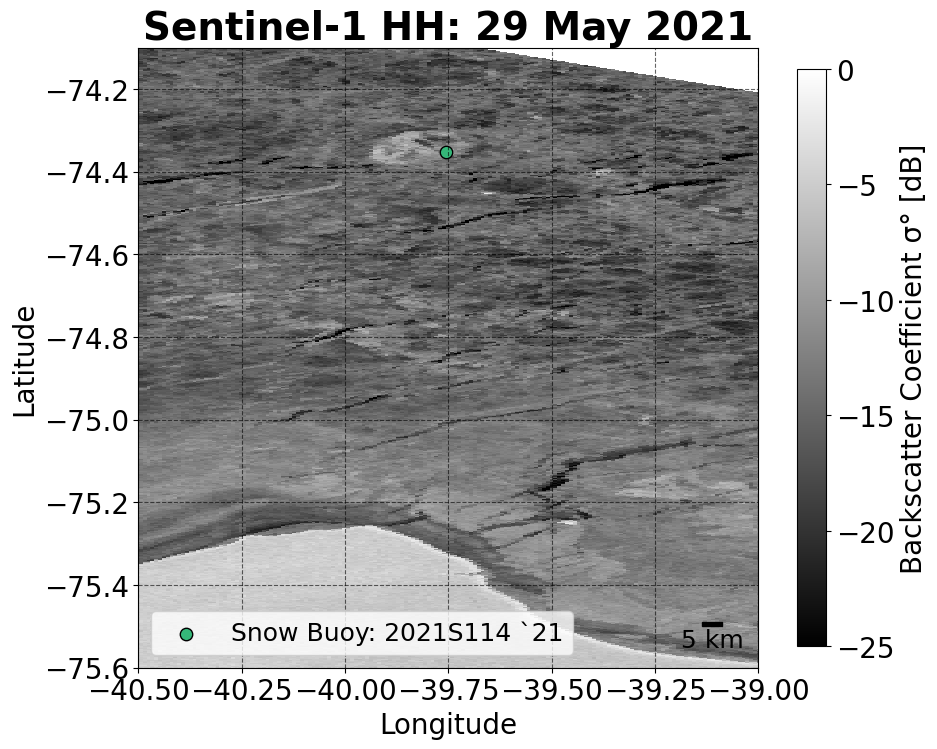

In [10]:
# Load the raster image (Sentinel-1 data)
with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band

    # Get the affine transformation of the raster
    transform = src.transform

    plt.figure(figsize=(10, 10))

    scaling_factor = 100000  
    band1_db = band1 / scaling_factor

    decibel = 10 * np.log10(band1_db)
    
    # Display the raster image
    img = plt.imshow(decibel, cmap="gray", vmax=0, vmin=-25, extent=(
        transform[2],  # xmin (left)
        transform[2] + transform[0] * band1.shape[1],  # xmax (right)
        transform[5] + transform[4] * band1.shape[0],  # ymin (bottom)
        transform[5]  # ymax (top)
    ))
    
    # Adjust the color bar size
    cbar = plt.colorbar(img, shrink=0.75)  # Shrink to make it smaller
    cbar.set_label("Backscatter Coefficient σ° [dB]", fontsize=20)
    cbar.ax.tick_params(labelsize=20)  # Set colorbar tick label size

    # Title and labels
    plt.title("Sentinel-1 HH: 29 May 2021", fontsize=28, fontweight="bold")
    plt.xlabel("Longitude", fontsize=20)
    plt.ylabel("Latitude", fontsize=20)

    # Assuming you have the buoy"s coordinates
    Buoy_lon = matches.loc[day, "lon_buoy"]  # Longitude of the buoy
    Buoy_lat = matches.loc[day, "lat_buoy"]  # Latitude of the buoy
    
    # Plot the buoy location
    plt.scatter(Buoy_lon, Buoy_lat, color="#35b779", marker="o", s=80, label="Snow Buoy: 2021S114 `21", edgecolor="black")

    lon_min, lon_max = -42.79, -38 # Set longitude limits
    lat_min, lat_max =-76, -74  # Set latitude limits


    plt.xlim(-40.5, -39 )  # Set longitude limits
    plt.ylim(-75.6, -74.1)

    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)

    # Add grid
    plt.grid(True, linestyle="--", alpha=0.6, c="black")


    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    import matplotlib.font_manager as fm

    # Add scale bar
    fontprops = fm.FontProperties(size=18)
    scale_factor_km = 1.0  # Adjust based on your actual scaling factor in degrees to kilometers
    scalebar = AnchoredSizeBar(plt.gca().transData,
                               0.05,  # Length of the bar in data units (longitude degrees here)
                               "5 km",  # Label
                               "lower right",  # Position
                               pad=0.5,
                               color="black",
                               frameon=False,
                               size_vertical=0.01,
                               fontproperties=fontprops)

    plt.gca().add_artist(scalebar)


    plt.legend(fontsize=18, loc="lower left")


    plt.savefig("Sentinel1_29052021_grid.png", dpi=300,  bbox_inches="tight")

    plt.show()


<div class="alert alert-info" role="alert">

## <a id="section3"></a>Sentinel-1 Image and Location of Snow Buoy for 2022-05-09
[Back to top](#TOC_TOP)

</div>

In [11]:
day = 23
Timestamp = matches["Timestamp"][day] 
Snow_Buoy_Nr = matches["Sensor_Number"][day]
print(f"Day: {Timestamp}, Snow Buoy: {Snow_Buoy_Nr}")

Day: 2022-05-09, Snow Buoy: 2021S114


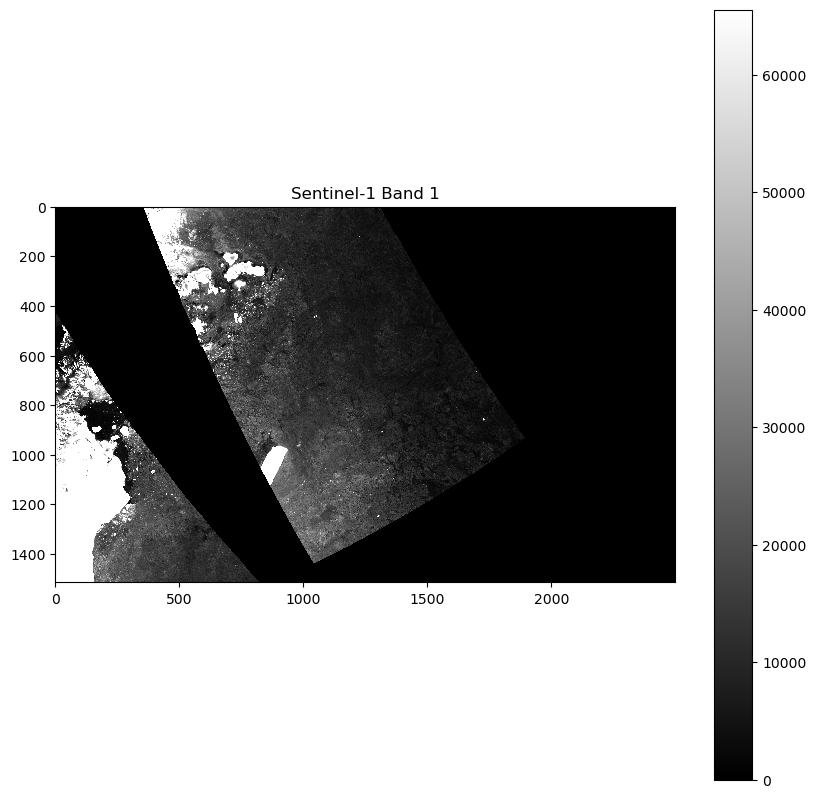

In [12]:
# Specify the path to your Sentinel-1 GeoTIFF file
file_path = "Sentinel 1 images/2022-05-09-00_00_2022-05-09-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff"


with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band
    
    plt.figure(figsize=(10, 10))
    plt.imshow(band1, cmap="gray")
    plt.colorbar()
    plt.title("Sentinel-1 Band 1")
    plt.show()



In [13]:
Sentinel1 = gu.SatelliteImage(file_path)
Sentinel1.bounds

BoundingBox(left=-62.87475585937501, bottom=-68.13030532177474, right=-39.693603515625014, top=-62.26235607934051)

In [14]:
Sentinel1.info()

Driver:               GTiff 
Opened from file:     Sentinel 1 images/2022-05-09-00_00_2022-05-09-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff 
Filename:             Sentinel 1 images/2022-05-09-00_00_2022-05-09-23_59_Sentinel-1_EW_HH_HH_-_linear_gamma0.tiff 
Loaded?               True 
Modified since load?  False 
Grid size:            2500, 1515
Number of bands:      3
Data types:           uint16
Coordinate system:    ['EPSG:4326']
Nodata value:         None
Pixel interpretation: Area
Pixel size:           0.0092724609375, 0.0038732338233889298
Upper left corner:    -62.87475585937501, -68.13030532177474
Lower right corner:   -39.693603515625014, -62.26235607934051



In [15]:
print(f"EPSG code: {Sentinel1.crs.to_epsg()}\n")
print(f"Printed as WKT string: \n{Sentinel1.crs.to_wkt()}")

EPSG code: 4326

Printed as WKT string: 
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


Converted dB values range: 0.0 to 0.65535


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_44224\3887597507.py:15: RuntimeWarning: divide by zero encountered in log10
  decibel = 10 * np.log10(band1_db)


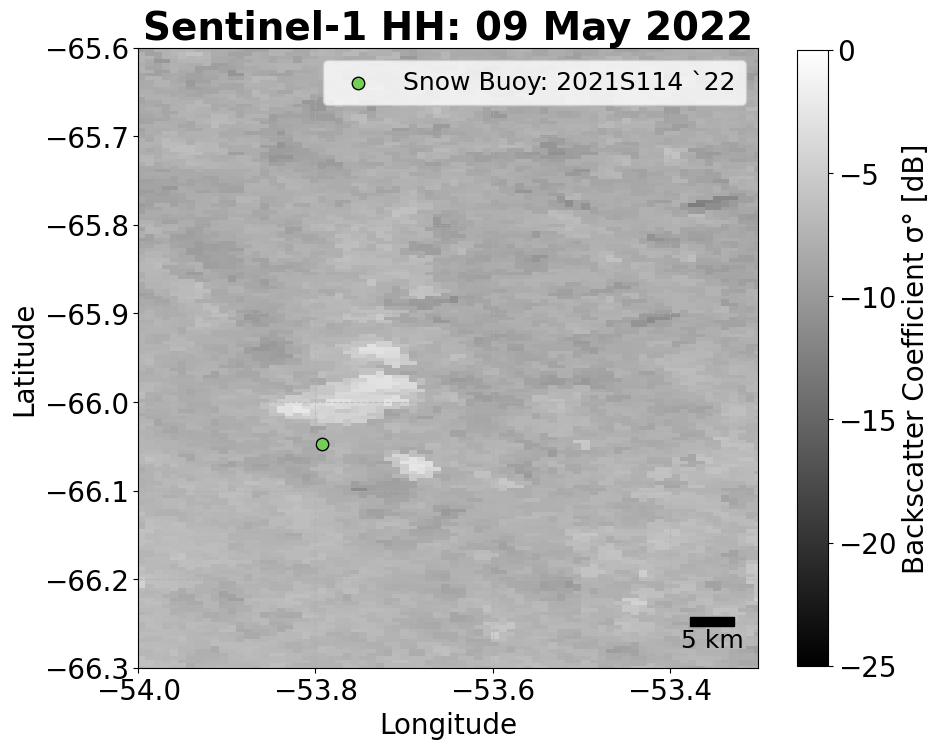

In [16]:
# Load the raster image (Sentinel-1 data)
with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band

    # Get the affine transformation of the raster
    transform = src.transform

    plt.figure(figsize=(10, 10))

    scaling_factor = 100000  
    band1_db = band1 / scaling_factor

    print(f"Converted dB values range: {band1_db.min()} to {band1_db.max()}")

    decibel = 10 * np.log10(band1_db)
    
    # Display the raster image
    img = plt.imshow(decibel, cmap="gray", vmax=0, vmin=-25, extent=(
        transform[2],  # xmin (left)
        transform[2] + transform[0] * band1.shape[1],  # xmax (right)
        transform[5] + transform[4] * band1.shape[0],  # ymin (bottom)
        transform[5]  # ymax (top)
    ))

    # Adjust the color bar size
    cbar = plt.colorbar(img, shrink=0.8)  # Shrink to make it smaller
    cbar.set_label("Backscatter Coefficient σ° [dB]", fontsize=20)
    cbar.ax.tick_params(labelsize=20)  # Set colorbar tick label size

    # Title and labels
    plt.title("Sentinel-1 HH: 09 May 2022", fontsize=28, fontweight="bold")
    plt.xlabel("Longitude", fontsize=20)
    plt.ylabel("Latitude", fontsize=20)

    # Assuming you have the buoy"s coordinates
    Buoy_lon = matches.loc[23, "lon_buoy"]  # Longitude of the buoy
    Buoy_lat = matches.loc[23, "lat_buoy"]  # Latitude of the buoy
    
    # Plot the buoy location
    plt.scatter(Buoy_lon, Buoy_lat, color="#73d055", marker="o", s=80, label="Snow Buoy: 2021S114 `22", edgecolor="black")


    # Set x and y limits to define the extent (change these values as needed)
    plt.xlim(-54, -53.3)  # Set longitude limits
    plt.ylim(-66.3, -65.6)  # Set latitude limits

    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)

    # Add grid
    plt.grid(True, linestyle="--", alpha=0.6)

    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    import matplotlib.font_manager as fm

        # Add scale bar
    fontprops = fm.FontProperties(size=18)
    scale_factor_km = 1.0  # Adjust based on your actual scaling factor in degrees to kilometers
    scalebar = AnchoredSizeBar(plt.gca().transData,
                               0.05,  # Length of the bar in data units (longitude degrees here)
                               "5 km",  # Label
                               "lower right",  # Position
                               pad=0.5,
                               color="black",
                               frameon=False,
                               size_vertical=0.01,
                               fontproperties=fontprops)

    plt.gca().add_artist(scalebar)
    plt.legend(fontsize=18, loc="upper right")

    plt.savefig("Sentinel1_09052022.png", dpi=300,  bbox_inches="tight")

    plt.show()


C:\Users\Kirsten\AppData\Local\Temp\ipykernel_44224\1014836869.py:12: RuntimeWarning: divide by zero encountered in log10
  decibel = 10 * np.log10(band1_db)


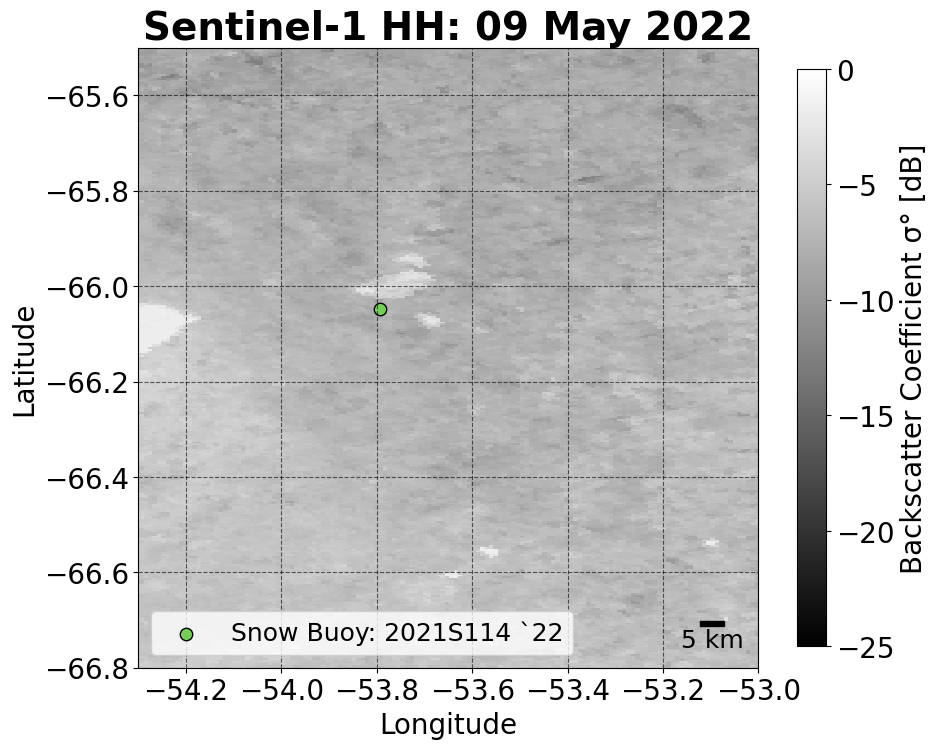

In [17]:
with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Read the first band

    # Get the affine transformation of the raster
    transform = src.transform

    plt.figure(figsize=(10, 10))

    scaling_factor = 100000 
    band1_db = band1 / scaling_factor

    decibel = 10 * np.log10(band1_db)

    # Display the raster image
    img = plt.imshow(decibel, cmap="gray", vmax=0, vmin=-25, extent=(
        transform[2],  # xmin (left)
        transform[2] + transform[0] * band1.shape[1],  # xmax (right)
        transform[5] + transform[4] * band1.shape[0],  # ymin (bottom)
        transform[5]  # ymax (top)
    ))
    
    # Adjust the color bar size
    cbar = plt.colorbar(img, shrink=0.75)  # Shrink to make it smaller
    cbar.set_label("Backscatter Coefficient σ° [dB]", fontsize=20)
    cbar.ax.tick_params(labelsize=20)  # Set colorbar tick label size

    # Title and labels
    plt.title("Sentinel-1 HH: 09 May 2022", fontsize=28, fontweight="bold")
    plt.xlabel("Longitude", fontsize=20)
    plt.ylabel("Latitude", fontsize=20)

    # Assuming you have the buoy"s coordinates
    Buoy_lon = matches.loc[day, "lon_buoy"]  # Longitude of the buoy
    Buoy_lat = matches.loc[day, "lat_buoy"]  # Latitude of the buoy
    
    # Plot the buoy location
    plt.scatter(Buoy_lon, Buoy_lat, color="#73d055", marker="o", s=80, label="Snow Buoy: 2021S114 `22", edgecolor="black")

    lon_min, lon_max = -55, -52  # Set longitude limits
    lat_min, lat_max = -68, -65  # Set latitude limits


    plt.xlim(-54.3, -53)  # Set longitude limits
    plt.ylim(-66.8, -65.5)  # Set latitude limits

    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)

    plt.grid(True, linestyle="--", alpha=0.6, c="black")

    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    import matplotlib.font_manager as fm

    # Add scale bar
    fontprops = fm.FontProperties(size=18)
    scale_factor_km = 1.0  # Adjust based on your actual scaling factor in degrees to kilometers
    scalebar = AnchoredSizeBar(plt.gca().transData,
                               0.05,  # Length of the bar in data units (longitude degrees here)
                               "5 km",  # Label
                               "lower right",  # Position
                               pad=0.5,
                               color="black",
                               frameon=False,
                               size_vertical=0.01,
                               fontproperties=fontprops)

    plt.gca().add_artist(scalebar)

    plt.legend(fontsize=18, loc="lower left")


    plt.savefig("Sentinel1_09052022_grid.png", dpi=300,  bbox_inches="tight")

    plt.show()
